# Should this loan be approved or not?

### Import Data & Library

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
SBA = pd.read_csv("../data/SBAnational.csv", na_values='nan')
SBA.head()

C:\Users\dnb02\AppData\Local\Temp\ipykernel_16424\2910655126.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  SBA = pd.read_csv("../data/SBAnational.csv", na_values='nan')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
SBA.drop_duplicates(keep='first')
SBA.shape

(899164, 27)

**Columns**

1. LoanNr_ChkDgt     : Identifier
2. Name              : Borrower Name
3. City              : Borrower City
4. State             : Borrower State
5. Zip               : Borrower Zip Code
6. Bank              : Bank Name
7. BankState         : Bank State
8. NAICS             : North American industry classification system code.
9. ApprovalDate      : Date SBA commitment issued
10. ApprovalFY        : Fiscal year of commitment
11. Term              : Loan term in months
12. NoEmp             : Number of Business Employees
13. NewExist          : 1 = Existing business, 2 = New business
14. CreateJob         : Number of Jobs Created
15. RetainedJob       : Number of jobs retained
16. FranchiseCode     : Franchise code, (00000 or 00001) = No franchise
17. UrbanRural        : 1 = Urban, 2 = rural, 0 = undefined
18. RevLineCr         : Revolving line of credit: Y = Yes, N = No
19. LowDoc            : LowDoc Loan Program: Y = Yes, N = No
20. ChgOffDate        : The date when a loan is declared to be in default
21. DisbursementDate  : Disbursement date
22. DisbursementGross : Amount disbursed
23. BalanceGross      : Gross amount outstanding
24. MIS_Status        : Loan status charged off = CHGOFF, Paid in full = PIF
25. ChgOffPrinGr      : Charged-off amount
26. GrAppv            : Gross amount of loan approved by bank
27. SBA_Appv          : SBA's guaranteed amount of approved loan

### Exploratory Data Analysis

In [6]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
SBA.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [8]:
list_item = []
for col in SBA.columns:
    list_item.append([col, SBA[col].dtype, SBA[col].isna().sum(), round((SBA[col].isna().sum()/len(SBA[col]))*100,2),
                      SBA[col].nunique(), list(SBA[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPercentage', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,nulPercentage,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[2390365009, 2868475007, 8604254008, 249452500..."
1,Name,object,14,0.00,779583,"[GREAT LAKES LINE-X, CLASSIC APARTMENT RESTORA..."
2,City,object,30,0.00,32581,"[CHICAGO, EASTHAMPTON, WINCHESTER, SANTA MARIA..."
3,State,object,14,0.00,51,"[WI, OR, TX, AL, LA]"
4,Zip,int64,0,0.00,33611,"[57110, 95380, 90807, 16630, 65785]"
5,Bank,object,1559,0.17,5802,"[COMMUNITY BANK, CAPITAL ONE NATL ASSOC, SIMMO..."
6,BankState,object,1566,0.17,56,"[CA, GA, CO, OH]"
7,NAICS,int64,0,0.00,1312,"[443112, 0, 445120]"
8,ApprovalDate,object,0,0.00,9859,"[25-Feb-08, 2-May-08, 4-Mar-92, 30-Nov-94, 30-..."
9,ApprovalFY,object,0,0.00,70,"[2005, 1996, 2007, 1998]"


### Feature Selection
#### 1. Target feature
The `MIS_Status` is the feature explains which borrower cannot repay loans => Our target to predict

In [9]:
print(SBA.shape)
SBA.value_counts('MIS_Status')

(899164, 27)


MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

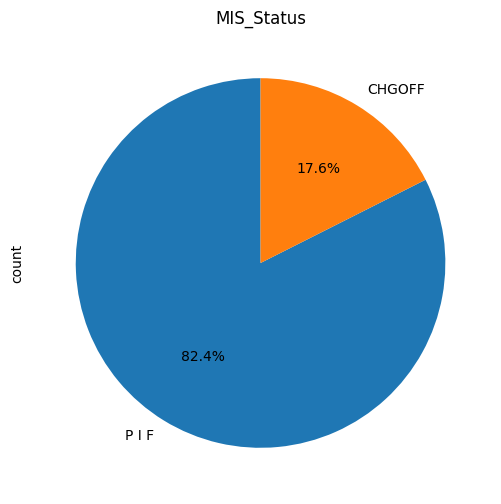

In [10]:
# Visualize the MIS_Status using pie chart
plt.figure(figsize=(10, 6))
SBA['MIS_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('MIS_Status')
plt.show()
# Imbalanced dataset

#### 2. Train Features
##### 2.1. Borrower and Institusion Information 
From SBA Data Frame we can make a conclusion that there are seven columns that give personal and instituion information
- `LoanNr_ChkDgt` as borrower Identifeir
- `Name` as Borrower Name
- `City` as Borrower City
- `State` as Borrower State
- `Zip` as Borrower Zip Code
- `Bank` as Bank Name
- `BankState` as Bank State
- `FranchiseCode` as FranchiseCode
- `UrbanRural` as information about business

I think only `City` and `State` should be considered since Geography plays a significant role in the field of business.

In [11]:
# Count unique values in City and State, alot of unique values in City
print(SBA['City'].nunique()) 
print(SBA['State'].nunique())
# A lot of unique values, I don't think it's a good idea to use City and State as features

32581
51


A lot of unique values in City and State, I don't think it's a good idea to use City and State as train features.

##### 2.2. NAICS (North American industry classification system code)
- `NAICS` is a classification system of several types of industries registered in America. 

The first two digits of `NAICS` explained the type of business industries.

The type of industry will affect the company's performance in business. So that this feature will affect the potential of the company.

In [12]:
SBA['NAICS'].value_counts() # A lot of inappropiate values

NAICS
0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
927110         1
327410         1
314992         1
922110         1
325192         1
Name: count, Length: 1312, dtype: int64

##### 2.3. Date and Time Feature
- `ApprovalDate` : Date SBA commitment issued
- `ApprovalFY` : Fiscal year of commitment
- `DisbursementDate` : Disbursement date
- `ChgOffDate` : The date when a loan is declared to be in default

Since these features are used only for additional informations, I think we can drop them.

The first three features are in the same period of history. At the time the loan application is requested, we cannot predict how the economic situation will change so these features will not provide any important information.

The last feature is just know after a loan is declared to be in default.

So these features will not be used as train features.

##### 2.4. Term
The `Term` provides information on how long the loan will take. 

Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. 

In [13]:
# Let's count unique values in Term column
SBA['Term'].value_counts() # Quite a lot of unique values

Term
84     230162
60      89945
240     85982
120     77654
300     44727
        ...  
438         1
382         1
367         1
374         1
429         1
Name: count, Length: 412, dtype: int64

##### 2.5. Job Columns
- `NoEmp` : Number of business employees 
- `CreateJob` : Number of jobs created
- `RetainedJob` : Number of jobs retained

Only `NoEmp` should be considered here since it indicates how big the company is, `RetainedJob` can be used to impute NewExist.

<Axes: xlabel='MIS_Status', ylabel='NoEmp'>

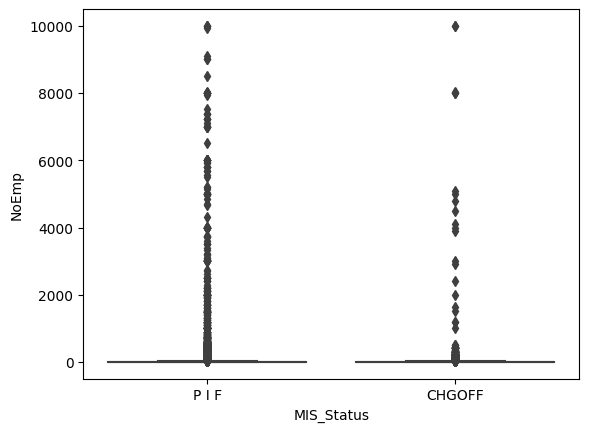

In [14]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['NoEmp'])
# Seems like companies with a small number of employees are more likely to default

<Axes: xlabel='MIS_Status', ylabel='CreateJob'>

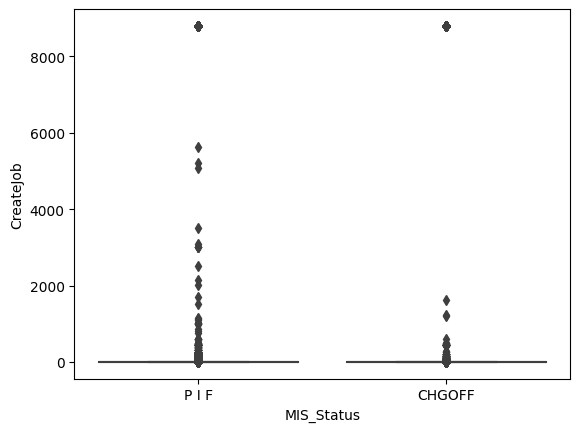

In [15]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['CreateJob'])

<Axes: xlabel='MIS_Status', ylabel='RetainedJob'>

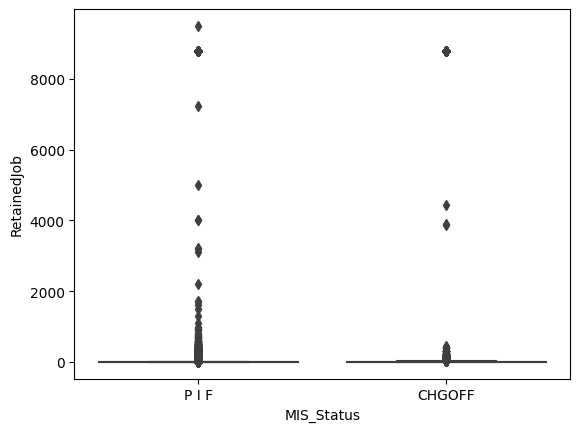

In [16]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['RetainedJob'])

By looking at the correlation between default and the number of jobs created, the `CreateJob` and `RetainedJob` features will not be included in the modeling.

##### 2.6. Business conditions: a new or existing business. ( Should be considered )
- `NewExist` = 1: Existing business
- `NewExist` = 2: New business

In [17]:
SBA['NewExist'].value_counts() # And 106 nan values

NewExist
1.0    644869
2.0    253125
0.0      1034
Name: count, dtype: int64

In [18]:
# The 0 values of NewExist column are not in the data dictionary
# I will consider them as missing values
SBA['NewExist'] = SBA['NewExist'].replace(0, np.nan)

##### 2.7. Loan Transaction Type
- `RevLineCr` : Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.
- `LowDoc` : LowDoc Loan Program from the SBA makes applying for a loan of $150,000 or less somewhat easy.

https://www.sba7a.loans/

Loan type can impact a borrower's financial stability, decision-making, and repayment behavior. Lenders also need to manage risks associated with different transaction types. Both parties should carefully evaluate the loan type before proceeding.

In [19]:
# Revolving line of credit: Y = Yes, N = No
SBA['RevLineCr'].value_counts() # And there are null values

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

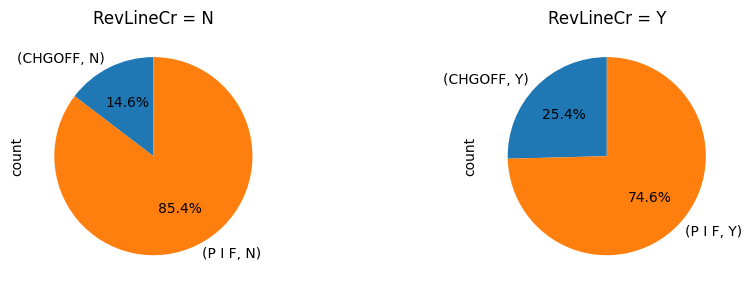

In [20]:
filtered_data = SBA[(SBA['RevLineCr'] == 'N') | (SBA['RevLineCr'] == 'Y')]

# Create a figure with two subplots for different RevLineCr values
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

for idx, rev_value in enumerate(['N', 'Y']):
    ax = axs[idx]
    rev_data = filtered_data[filtered_data['RevLineCr'] == rev_value]
    rev_data.groupby('MIS_Status')['RevLineCr'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', shadow=False, startangle=90, ax=ax
    )
    ax.set_title(f'RevLineCr = {rev_value}')

plt.tight_layout()
plt.show()

In [21]:
# LowDoc: Y = Yes, N = No
SBA['LowDoc'].value_counts() # And there are null values

LowDoc
N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: count, dtype: int64

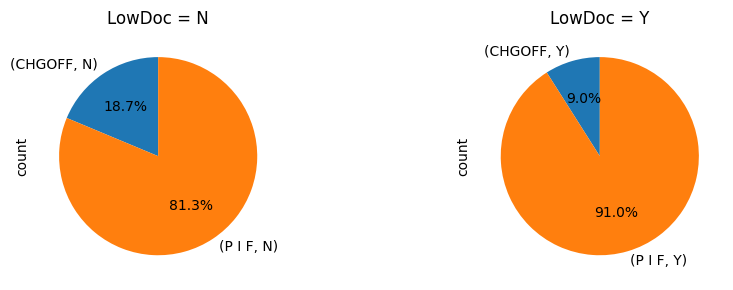

In [22]:
filtered_data = SBA[(SBA['LowDoc'] == 'N') | (SBA['LowDoc'] == 'Y')]

# Create a figure with two subplots for different LowDoc values
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

for idx, lowd_value in enumerate(['N', 'Y']):
    ax = axs[idx]
    rev_data = filtered_data[filtered_data['LowDoc'] == lowd_value]
    rev_data.groupby('MIS_Status')['LowDoc'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', shadow=False, startangle=90, ax=ax
    )
    ax.set_title(f'LowDoc = {lowd_value}')

plt.tight_layout()
plt.show()

##### 2.8. Amount 
- `DisbursementGross `: Amount disbursed, the total amount that was transferred to the customer before the default was declared.
- `BalanceGross `: Gross amount outstanding
- `ChgOffPrinGr` : Charged-off amount
- `GrAppv `: Gross amount of loan approved by bank
- `SBA_Appv `: SBA's guaranteed amount of approved loan

*** 
Drop `DisbursementGross`, `BalanceGross`, and `ChgOffPrinGr`

Since `DisbursementGross`, `BalanceGross`, and `ChgOffPrinGr` only explain the balance of the loan and not used for loan approval, so these features can be ignored.

Columns `DisbursementGross`, `BalanceGross` and `ChgOffPrinGr` contain information that is important after default is declared, so we can't use these columns for predicting default risks. We delete them.

***
Drop `GrAppv` and `SBA_Appv` and  add `SBA_GrPortion`

We find that the portion of the loan guaranteed by the SBA is more important than individual value. So we will drop `GrAppv` and `SBA_Appv` and add `SBA_GrPortion` (the ratio of the amount of the loan SBA guarantees and the gross amount approved by the bank (`SBA_Appv`/`GrAppv`))

In [23]:
SBA[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv','SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


In [24]:
# Cleaning currency columns
SBA['GrAppv'] = SBA['GrAppv'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
SBA['SBA_Appv'] = SBA['SBA_Appv'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

In [25]:
SBA['SBA_GrPortion'] = SBA['SBA_Appv'] / SBA['GrAppv']

In [26]:
# Drop unnecessary columns
data = SBA.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'FranchiseCode','UrbanRural', 
                 'CreateJob', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate',
                 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'], axis=1)
# RetainedJob is a feature that I can use to impute NewExist
# So I will drop them later

In [27]:
data.head()

,NAICS,Term,NoEmp,NewExist,RetainedJob,RevLineCr,LowDoc,MIS_Status,SBA_GrPortion
0,451120,84,4,2.0,0,N,Y,P I F,0.80
1,722410,60,2,2.0,0,N,Y,P I F,0.80
2,621210,180,7,1.0,0,N,N,P I F,0.75
3,0,60,2,1.0,0,N,Y,P I F,0.80
4,0,240,14,1.0,7,N,N,P I F,1.00


In [28]:
data.MIS_Status.value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

### Data Cleaning

In [29]:
data.shape

(899164, 9)

In [30]:
# Check for null values
for col in data.columns:
    print(col, data[col].isnull().sum())

NAICS 0
Term 0
NoEmp 0
NewExist 1170
RetainedJob 0
RevLineCr 4528
LowDoc 2582
MIS_Status 1997
SBA_GrPortion 0


#### Target Feature: `MIS_Status`

In [31]:
data.dropna(subset=['MIS_Status'], inplace=True)

#### Train Features

In [32]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique(), list(data[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dataDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,NAICS,int64,0,0.00,1312,"[722211, 484110, 112320, 0, 621111]"
1,Term,int64,0,0.00,412,"[300, 84, 240, 120]"
2,NoEmp,int64,0,0.00,598,"[17, 2, 5, 10]"
3,NewExist,float64,1162,0.13,2,"[1.0, 2.0]"
4,RetainedJob,int64,0,0.00,357,"[2, 0, 1]"
5,RevLineCr,object,4520,0.50,18,[N]
6,LowDoc,object,2578,0.29,8,"[N, Y]"
7,MIS_Status,object,0,0.00,2,[P I F]
8,SBA_GrPortion,float64,0,0.00,14171,"[0.85, 0.5, 1.0, 0.9]"


##### Create `RealEstate` column based on `Term` column
Since the term of loan is a function of the expected life-time of the assets, 
loans backed by real estate will have terms 20 years or greater (>=240 months). 

Therefore we decided to create a column named 'RealEstate' based on the column Term. 

If Term >=240 months then RealEstate = 1 else 0. 

In [33]:
data['RealEstate'] = data['Term'].apply(lambda x: 1 if x >= 240 else 0)

##### Handle `NewExist` column
There is the column RetainedJob which is the number of jobs retained.

Which means if the retained job is not 0, it is existing company.

In [34]:
data.loc[(data['NewExist'].isnull()) & (data['RetainedJob'] != 0), 'NewExist'] = 1
data = data.drop(columns=['RetainedJob'])
data = data.dropna(subset=['NewExist'])
data['NewExist'].astype(int)

0         2
1         2
2         1
3         1
4         1
         ..
899159    1
899160    1
899161    1
899162    1
899163    2
Name: NewExist, Length: 896273, dtype: int32

##### Remove missing and inappropriate values in `LowDoc` and `RevLineCr` columns

In [35]:
data['LowDoc'].dropna(inplace=True)
data = data[(data.LowDoc == 'Y') | (data.LowDoc == 'N')]
data['LowDoc'].value_counts()

LowDoc
N    780230
Y    110046
Name: count, dtype: int64

In [36]:
data['RevLineCr'].dropna(inplace=True)
data = data[(data.RevLineCr == 'Y') | (data.RevLineCr == 'N')]
data['RevLineCr'].value_counts()

RevLineCr
N    414275
Y    199701
Name: count, dtype: int64

##### Handle `NAICS` column

In [37]:
data = data[data['NAICS'].astype(str).apply(len) == 6] # Drop inappropiate values

In [38]:
# Join NAICS with similar industry
def naics(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [39]:
data['NAICS'] = data['NAICS'].apply(naics)

In [40]:
data.head()

,NAICS,Term,NoEmp,NewExist,RevLineCr,LowDoc,MIS_Status,SBA_GrPortion,RealEstate
0,44-45,84,4,2.0,N,Y,P I F,0.80,0
1,72,60,2,2.0,N,Y,P I F,0.80,0
2,62,180,7,1.0,N,N,P I F,0.75,0
5,31-33,120,19,1.0,N,N,P I F,0.75,0
7,81,84,1,2.0,N,Y,P I F,0.80,0


### Export .csv file

In [41]:
# Export the cleaned data
data.to_csv("../data/SBA_cleaned.csv", index=False)